Les données du projet se trouvent sous https://www.football-data.co.uk/downloadm.php

Prenez les 7 dernières saisons de L1

* Le Goal du projet, c'est ... prédire le résultat du match

Vous ne travaillerez que sur les côtes Victoire à Domicile / Exterieur / NUL

# Préparation des donneés

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import plotly.express as px
import statsmodels.api
output_notebook()  # pour un affichage en ligne

In [ ]:
from google.colab import files
files.upload()

Saving F1_2015_2016.csv to F1_2015_2016.csv
Saving F1_2016_2017.csv to F1_2016_2017.csv
Saving F1_2017_2018.csv to F1_2017_2018.csv
Saving F1_2018_2019.csv to F1_2018_2019.csv
Saving F1_2019_2020.csv to F1_2019_2020.csv
Saving F1_2020_2021.csv to F1_2020_2021.csv
Saving F1_2021_2022.csv to F1_2021_2022.csv


{'F1_2015_2016.csv': b'Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA\r\nF1,07/08/15,Lille,Paris SG,0,1,A,0,0,D,12,7,2,2,20,17,3,2,3,2,0,1,6.5,3.6,1.57,6.75,3.75,1.65,4.65,3.4,1.75,6,3.5,1.67,6.64,3.78,1.65,6,3.6,1.62,7,3.8,1.62,42,7,6.12,3.8,3.61,1.75,1.62,39,2.35,2.24,1.67,1.63,25,0.75,2.11,2.03,1.85,1.8,7.58,3.91,1.58\r\nF1,08/08/15,Bastia,Rennes,2,1,H,0,1,A,11,6,3,3,15,19,6,2,0,1,1,0,2.6,3.1,2.8,2.6,2.9,2.9,2.3,3.1,3.1,2.5,2.88,2.88,2.71,3.09,3,2.6,2.9,3,2.63,3.1,3.1,45,2.71,2.56,3.18,3.02,3.1,2.92,37,2.66,2.51,1.55,1.5,27,0,1.87,1.8,2.1,2.03,2.81,2.93,3.1\r\nF1,08/08/15,Marseille,Caen,0,1,A,0,1,A,17,8,4,4,10,10,14,2,1,0,0,0,1.57,4,6,1.55,4.33,6,1.55,3.7,6,1.5,3.8,5.75,1.56,4.35,6.59,1.57,4,5.5,1.55,4.4,6.5,45

In [ ]:
# Le format date est importé au format européen
df_2015 = pd.read_csv('F1_2015_2016.csv', parse_dates=['Date'],dayfirst=True)
df_2016 = pd.read_csv('F1_2016_2017.csv', parse_dates=['Date'],dayfirst=True)
df_2017 = pd.read_csv('F1_2017_2018.csv', parse_dates=['Date'],dayfirst=True)
df_2018 = pd.read_csv('F1_2018_2019.csv', parse_dates=['Date'],dayfirst=True)
df_2019 = pd.read_csv('F1_2019_2020.csv', parse_dates=['Date'],dayfirst=True)
df_2020 = pd.read_csv('F1_2020_2021.csv', parse_dates=['Date'],dayfirst=True)
df_2021 = pd.read_csv('F1_2021_2022.csv', parse_dates=['Date'],dayfirst=True)

<ipython-input-4-64bbf54351af>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2015 = pd.read_csv('F1_2015_2016.csv', parse_dates=['Date'],dayfirst=True)
<ipython-input-4-64bbf54351af>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2016 = pd.read_csv('F1_2016_2017.csv', parse_dates=['Date'],dayfirst=True)
<ipython-input-4-64bbf54351af>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2017 = pd.read_csv('F1_2017_2018.csv', parse_dates=['Date'],dayfirst=True)


In [ ]:
# Création d'une colonne Saison pour chaque dataframe
df_2015['Saison'] = '2015'
df_2016['Saison'] = '2016'
df_2017['Saison'] = '2017'
df_2018['Saison'] = '2018'
df_2019['Saison'] = '2019'
df_2020['Saison'] = '2020'
df_2021['Saison'] = '2021'

In [ ]:
print("Le dataframe pour la saison 2015 contient", df_2015.shape[0], 'lignes et', df_2015.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2016 contient", df_2016.shape[0], 'lignes et', df_2016.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2017 contient", df_2017.shape[0], 'lignes et', df_2017.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2018 contient", df_2018.shape[0], 'lignes et', df_2018.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2019 contient", df_2019.shape[0], 'lignes et', df_2019.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2020 contient", df_2020.shape[0], 'lignes et', df_2020.shape[1], 'colonnes.')
print("Le dataframe pour la saison 2021 contient", df_2021.shape[0], 'lignes et', df_2021.shape[1], 'colonnes.')

Le dataframe pour la saison 2015 contient 381 lignes et 65 colonnes.
Le dataframe pour la saison 2016 contient 380 lignes et 65 colonnes.
Le dataframe pour la saison 2017 contient 380 lignes et 65 colonnes.
Le dataframe pour la saison 2018 contient 380 lignes et 62 colonnes.
Le dataframe pour la saison 2019 contient 279 lignes et 106 colonnes.
Le dataframe pour la saison 2020 contient 380 lignes et 106 colonnes.
Le dataframe pour la saison 2021 contient 380 lignes et 106 colonnes.


In [ ]:
# Cette fonction permet de déterminer les variables avec des valeurs manquantes
def valeur_manquante(df):
    flag=0
    for col in df.columns:
            if df[col].isna().sum() > 0:
                flag=1
                print(f'"{col}": {df[col].isna().sum()} valeur(s) manquante(s)')
    if flag==0:
        print("Le dataset ne contient plus de valeurs manquantes.")

valeur_manquante(df_2015)

"Div": 1 valeur(s) manquante(s)
"Date": 1 valeur(s) manquante(s)
"HomeTeam": 1 valeur(s) manquante(s)
"AwayTeam": 1 valeur(s) manquante(s)
"FTHG": 1 valeur(s) manquante(s)
"FTAG": 1 valeur(s) manquante(s)
"FTR": 1 valeur(s) manquante(s)
"HTHG": 1 valeur(s) manquante(s)
"HTAG": 1 valeur(s) manquante(s)
"HTR": 1 valeur(s) manquante(s)
"HS": 1 valeur(s) manquante(s)
"AS": 1 valeur(s) manquante(s)
"HST": 1 valeur(s) manquante(s)
"AST": 1 valeur(s) manquante(s)
"HF": 1 valeur(s) manquante(s)
"AF": 1 valeur(s) manquante(s)
"HC": 1 valeur(s) manquante(s)
"AC": 1 valeur(s) manquante(s)
"HY": 1 valeur(s) manquante(s)
"AY": 1 valeur(s) manquante(s)
"HR": 1 valeur(s) manquante(s)
"AR": 1 valeur(s) manquante(s)
"B365H": 2 valeur(s) manquante(s)
"B365D": 2 valeur(s) manquante(s)
"B365A": 2 valeur(s) manquante(s)
"BWH": 1 valeur(s) manquante(s)
"BWD": 1 valeur(s) manquante(s)
"BWA": 1 valeur(s) manquante(s)
"IWH": 1 valeur(s) manquante(s)
"IWD": 1 valeur(s) manquante(s)
"IWA": 1 valeur(s) manquante(

# Préparation des données

In [ ]:
df_2015=df_2015.dropna(subset = ['HomeTeam'], axis=0)
print("Le dataframe pour la saison 2015 contient", df_2015.shape[0], 'lignes et', df_2015.shape[1], 'colonnes.')

Le dataframe pour la saison 2015 contient 380 lignes et 65 colonnes.


In [ ]:
# Dictionnaire des nouveaux noms de colonnes
renaming_dict = {
    "Div": "League_Division",
    "Date": "Match_Date",
    "Time": "Match_Time",
    "HomeTeam": "Home_Team",
    "AwayTeam": "Away_Team",
    "FTHG": "FullTime_Home_Goals",
    "FTAG": "FullTime_Away_Goals",
    "FTR": "FullTime_Result",
    "HTHG": "HalfTime_Home_Goals",
    "HTAG": "HalfTime_Away_Goals",
    "HTR": "HalfTime_Result",
    "HS": "Home_Shots",
    "AS": "Away_Shots",
    "HST": "Home_Shots_On_Target",
    "AST": "Away_Shots_On_Target",
    "HC": "Home_Corners",
    "AC": "Away_Corners",
    "HY": "Home_Yellow_Cards",
    "AY": "Away_Yellow_Cards",
    "HR": "Home_Red_Cards",
    "AR": "Away_Red_Cards",
}

# Appliquer le renommage à toutes les saisons
for df in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    df.rename(columns=renaming_dict, inplace=True)

print("Colonnes renommées pour toutes les saisons")


Colonnes renommées pour toutes les saisons


<ipython-input-9-5ead19515d15>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=renaming_dict, inplace=True)


In [ ]:
dfs = {
    2015: df_2015,
    2016: df_2016,
    2017: df_2017,
    2018: df_2018,
    2019: df_2019,
    2020: df_2020,
    2021: df_2021
}

for year, df in dfs.items():
    print(f"Saison {year} : {df.shape[1]} colonnes - {list(df.columns)}\n")

Saison 2015 : 65 colonnes - ['League_Division', 'Match_Date', 'Home_Team', 'Away_Team', 'FullTime_Home_Goals', 'FullTime_Away_Goals', 'FullTime_Result', 'HalfTime_Home_Goals', 'HalfTime_Away_Goals', 'HalfTime_Result', 'Home_Shots', 'Away_Shots', 'Home_Shots_On_Target', 'Away_Shots_On_Target', 'HF', 'AF', 'Home_Corners', 'Away_Corners', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'Saison']

Saison 2016 : 65 colonnes - ['League_Division', 'Match_Date', 'Home_Team', 'Away_Team', 'FullTime_Home_Goals', 'FullTime_Away_Goals', 'FullTime_Result', 'HalfTime_Home_Goals', 'HalfTime_Away_Goals', 'HalfTime_Result'

# Gestion des valeurs manquantes

In [ ]:
df_total = pd.concat(dfs.values(), ignore_index=True)
print("Dataset total après fusion :", df_total.shape[0], "lignes,", df_total.shape[1], "colonnes.")

# Liste des colonnes essentielles qu'on veut absolument garder
essential_columns = ["League_Division", "Match_Date", "Home_Team", "Away_Team",
                     "FullTime_Result", "FullTime_Home_Goals", "FullTime_Away_Goals"]

# Vérifier si elles sont bien dans df_total
missing_columns = [col for col in essential_columns if col not in df_total.columns]

if missing_columns:
    print("Attention ! Certaines colonnes essentielles sont absentes :", missing_columns)
else:
    print("Toutes les colonnes essentielles sont présentes !")


Dataset total après fusion : 2559 lignes, 127 colonnes.
Toutes les colonnes essentielles sont présentes !


In [ ]:
# Charger un des fichiers CSV de base pour récupérer l'ordre des colonnes
reference_df = pd.read_csv("F1_2015_2016.csv")  # Change si besoin

# Sauvegarder l'ordre original des colonnes
original_column_order = list(reference_df.columns)

print("Ordre original des colonnes récupéré :", original_column_order)


Ordre original des colonnes récupéré : ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA']


In [ ]:
# FUSIONNER LES SAISONS
df_total = pd.concat(dfs.values(), ignore_index=True)

print("Dataset total après fusion :", df_total.shape[0], "lignes,", df_total.shape[1], "colonnes.")
df_total.head()


Dataset total après fusion : 2559 lignes, 127 colonnes.


,League_Division,Match_Date,Home_Team,Away_Team,FullTime_Home_Goals,FullTime_Away_Goals,FullTime_Result,HalfTime_Home_Goals,HalfTime_Away_Goals,HalfTime_Result,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,F1,2015-08-07,Lille,Paris SG,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2015-08-08,Bastia,Rennes,2.0,1.0,H,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1,2015-08-08,Marseille,Caen,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2015-08-08,Montpellier,Angers,0.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2015-08-08,Nantes,Guingamp,1.0,0.0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Gestion des données bookmakers pour les prises de paris qui nous intéressent**

L'objectif ici est de filtrer, renommer et préparer les colonnes des cotes de paris pour l'analyse

In [ ]:
# Liste des colonnes de cotes 1X2
bookmakers_columns = [
    "B365H", "B365D", "B365A",     # Bet365
    "PSH", "PSD", "PSA",           # Pinnacle Sports
    "BWH", "BWD", "BWA",           # Bet&Win
    "IWH", "IWD", "IWA",           # Interwetten
    "WHH", "WHD", "WHA",           # William Hill
    "VCH", "VCD", "VCA"            # VC Bet
]

# Filtrer les colonnes qui existent dans df_total
bookmakers_columns = [col for col in bookmakers_columns if col in df_total.columns]

# Créer le DataFrame des cotes
df_bookmakers = df_total[["Match_Date", "Home_Team", "Away_Team", "FullTime_Result"] + bookmakers_columns].copy()

print("Aperçu des données bookmakers :")
df_bookmakers.head()

Aperçu des données bookmakers :


,Match_Date,Home_Team,Away_Team,FullTime_Result,B365H,B365D,B365A,PSH,PSD,PSA,...,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA
0,2015-08-07,Lille,Paris SG,A,6.50,3.6,1.57,6.64,3.78,1.65,...,1.65,4.65,3.40,1.75,6.00,3.6,1.62,7.00,3.8,1.62
1,2015-08-08,Bastia,Rennes,H,2.60,3.1,2.80,2.71,3.09,3.00,...,2.90,2.30,3.10,3.10,2.60,2.9,3.00,2.63,3.1,3.10
2,2015-08-08,Marseille,Caen,A,1.57,4.0,6.00,1.56,4.35,6.59,...,6.00,1.55,3.70,6.00,1.57,4.0,5.50,1.55,4.4,6.50
3,2015-08-08,Montpellier,Angers,A,1.83,3.4,4.75,1.81,3.44,5.53,...,5.25,1.80,3.40,4.35,1.75,3.3,5.50,1.80,3.5,5.50
4,2015-08-08,Nantes,Guingamp,H,2.20,3.1,3.60,2.20,3.11,4.01,...,3.50,2.10,3.15,3.45,2.25,3.1,3.40,2.15,3.1,4.20


# Partie Visualisation

Matrice de corrélation

In [ ]:
# Créer une copie du DataFrame pour l'analyse de corrélation
df_corr = df_total.copy()

# Colonnes à transformer temporairement en numérique (SAUF celles à conserver)
cols_to_convert = ["League_Division", "Match_Date", "Home_Team", "Away_Team", "FullTime_Result"]

# codes numériques
for col in cols_to_convert:
    df_corr[col] = df_corr[col].astype('category').cat.codes


In [ ]:
# Sélectionner uniquement les colonnes numériques
df_corr_numeric = df_corr.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation uniquement sur les colonnes numériques
correlation_matrix = df_corr_numeric.corr()

# Aperçu
print("Matrice de corrélation calculée sur les variables numériques :")
correlation_matrix.head()



NameError: name 'df_corr' is not defined

In [ ]:
# Extraire les corrélations avec la variable FullTime_Result
cor_target = correlation_matrix["FullTime_Result"]

# Trier par force de corrélation (valeur absolue)
cor_target = cor_target.abs().sort_values(ascending=False)

# Afficher les 10 variables les plus corrélées (hors FullTime_Result lui-même)
print("Variables les plus corrélées à FullTime_Result :")
print(cor_target[1:11])


Variables les plus corrélées à FullTime_Result :
FullTime_Home_Goals     0.636381
FullTime_Away_Goals     0.633767
HalfTime_Home_Goals     0.405544
HalfTime_Away_Goals     0.401906
Home_Shots_On_Target    0.390724
Away_Shots_On_Target    0.385185
AHCh                    0.378892
BbAHh                   0.375590
AHh                     0.373502
IWCH                    0.331196
Name: FullTime_Result, dtype: float64


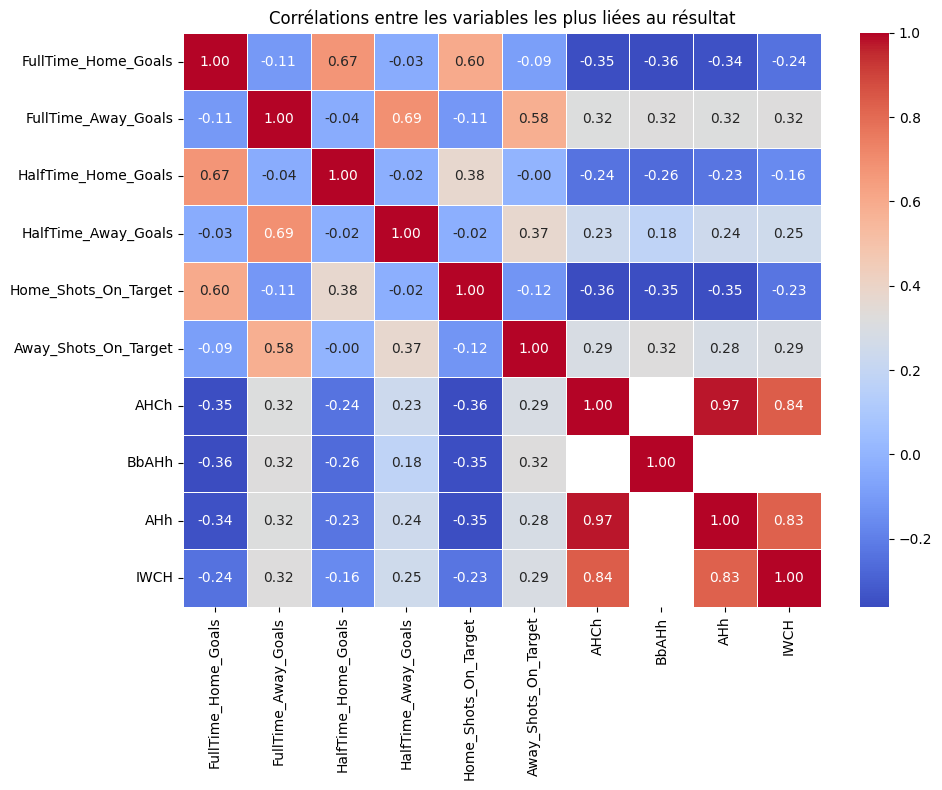

In [ ]:
# Sélectionner les 10 variables les plus corrélées au résultat
top_corr_vars = cor_target[1:11].index

# Sous-matrice de corrélation entre ces variables
top_corr_matrix = correlation_matrix.loc[top_corr_vars, top_corr_vars]

# Affichage d'une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélations entre les variables les plus liées au résultat")
plt.tight_layout()
plt.show()


**Comprendre les caractéristiques des clubs au fil des saisons **

L'intérêt étant de pouvoir répondre à des questions comme :

Quelle équipe tire le plus ?

Quels clubs encaissent le plus de cartons ?

Qui marque le plus à domicile ?

Comment les performances changent au fil des saisons ?

=> regrouper les données par club et par saison

In [ ]:
# Moyennes des stats par club et par saison (en tant qu'équipe à domicile)
club_stats_home = df_total.groupby(["Saison", "Home_Team"]).agg({
    "FullTime_Home_Goals": "mean",
    "Home_Shots": "mean",
    "Home_Shots_On_Target": "mean",
    "Home_Corners": "mean",
    "Home_Yellow_Cards": "mean",
    "Home_Red_Cards": "mean"
}).reset_index()

# Même chose pour les matchs à l'extérieur
club_stats_away = df_total.groupby(["Saison", "Away_Team"]).agg({
    "FullTime_Away_Goals": "mean",
    "Away_Shots": "mean",
    "Away_Shots_On_Target": "mean",
    "Away_Corners": "mean",
    "Away_Yellow_Cards": "mean",
    "Away_Red_Cards": "mean"
}).reset_index()

# Renommer pour fusion
club_stats_away = club_stats_away.rename(columns={"Away_Team": "Club"})
club_stats_home = club_stats_home.rename(columns={"Home_Team": "Club"})

# Fusion domicile/extérieur (moyenne)
club_stats = pd.merge(club_stats_home, club_stats_away, on=["Saison", "Club"], suffixes=('_Home', '_Away'))

# Affichage
club_stats.head()


,Saison,Club,FullTime_Home_Goals,Home_Shots,Home_Shots_On_Target,Home_Corners,Home_Yellow_Cards,Home_Red_Cards,FullTime_Away_Goals,Away_Shots,Away_Shots_On_Target,Away_Corners,Away_Yellow_Cards,Away_Red_Cards
0,2015,Ajaccio GFCO,1.210526,14.526316,4.157895,5.315789,2.052632,0.157895,0.736842,8.315789,2.368421,2.736842,2.631579,0.157895
1,2015,Angers,1.052632,11.210526,3.473684,3.842105,1.578947,0.157895,1.052632,9.684211,3.421053,3.210526,2.105263,0.157895
2,2015,Bastia,1.210526,9.157895,3.368421,4.526316,2.000000,0.210526,0.684211,8.315789,2.421053,2.368421,2.315789,0.315789
3,2015,Bordeaux,1.421053,13.368421,3.894737,5.210526,2.000000,0.105263,1.210526,9.789474,3.684211,4.789474,2.210526,0.263158
4,2015,Caen,1.000000,13.368421,4.736842,5.894737,1.315789,0.105263,1.052632,11.315789,4.473684,4.473684,1.421053,0.210526


Exemple : Visualiser un club au fil des saisons

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9917 (\N{SOCCER BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


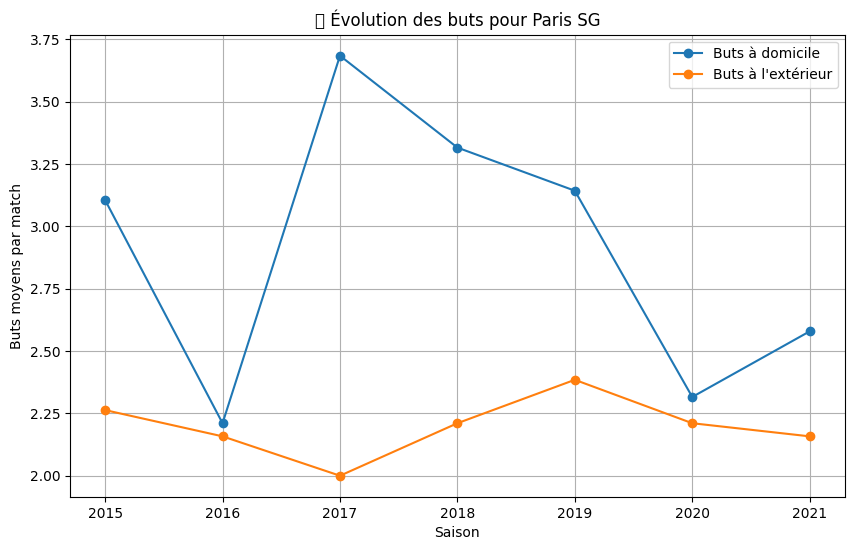

In [ ]:
club_name = "Paris SG"
club_trend = club_stats[club_stats["Club"] == club_name]

plt.figure(figsize=(10, 6))
plt.plot(club_trend["Saison"], club_trend["FullTime_Home_Goals"], marker="o", label="Buts à domicile")
plt.plot(club_trend["Saison"], club_trend["FullTime_Away_Goals"], marker="o", label="Buts à l'extérieur")
plt.title(f"Évolution des buts pour {club_name}")
plt.xlabel("Saison")
plt.ylabel("Buts moyens par match")
plt.legend()
plt.grid(True)
plt.show()


**Comprendre la répartition des buts**

1 - Répartition des buts à domicile vs à l’extérieur

In [ ]:
# Moyenne buts par match domicile et extérieur
home_goals_avg = df_total["FullTime_Home_Goals"].mean()
away_goals_avg = df_total["FullTime_Away_Goals"].mean()

print(f"Buts moyens à domicile : {home_goals_avg:.2f}")
print(f"Buts moyens à l'extérieur : {away_goals_avg:.2f}")


Buts moyens à domicile : 1.49
Buts moyens à l'extérieur : 1.16


2 - Répartition des buts en 1re mi-temps vs 2nde mi-temps

In [ ]:
# Création colonne 2e mi-temps
df_total["SecondHalf_Home_Goals"] = df_total["FullTime_Home_Goals"] - df_total["HalfTime_Home_Goals"]
df_total["SecondHalf_Away_Goals"] = df_total["FullTime_Away_Goals"] - df_total["HalfTime_Away_Goals"]

# Moyennes
first_half_avg = (df_total["HalfTime_Home_Goals"] + df_total["HalfTime_Away_Goals"]).mean()
second_half_avg = (df_total["SecondHalf_Home_Goals"] + df_total["SecondHalf_Away_Goals"]).mean()

print(f"Buts en 1re mi-temps : {first_half_avg:.2f}")
print(f"Buts en 2e mi-temps : {second_half_avg:.2f}")


Buts en 1re mi-temps : 1.16
Buts en 2e mi-temps : 1.49


3 - **Histogramme** : distribution du nombre total de buts par match

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


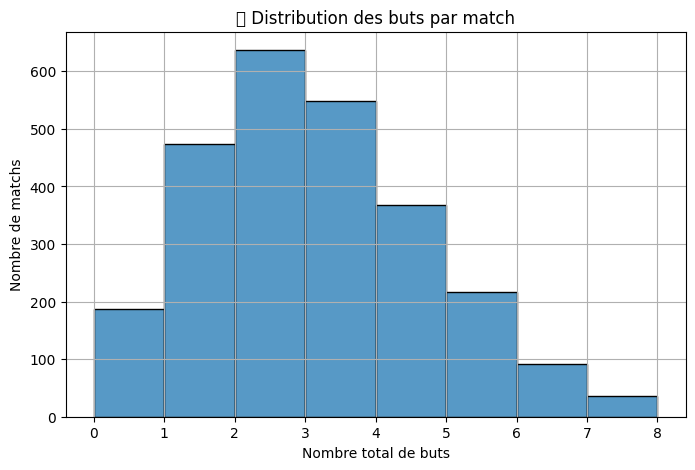

In [ ]:
# Total de buts par match
df_total["Total_Goals"] = df_total["FullTime_Home_Goals"] + df_total["FullTime_Away_Goals"]

# Affichage histogramme
plt.figure(figsize=(8, 5))
sns.histplot(df_total["Total_Goals"], bins=range(0, 9), kde=False)
plt.title(" Distribution des buts par match")
plt.xlabel("Nombre total de buts")
plt.ylabel("Nombre de matchs")
plt.grid(True)
plt.show()


4 - Heatmap du score final (matrice de fréquence)

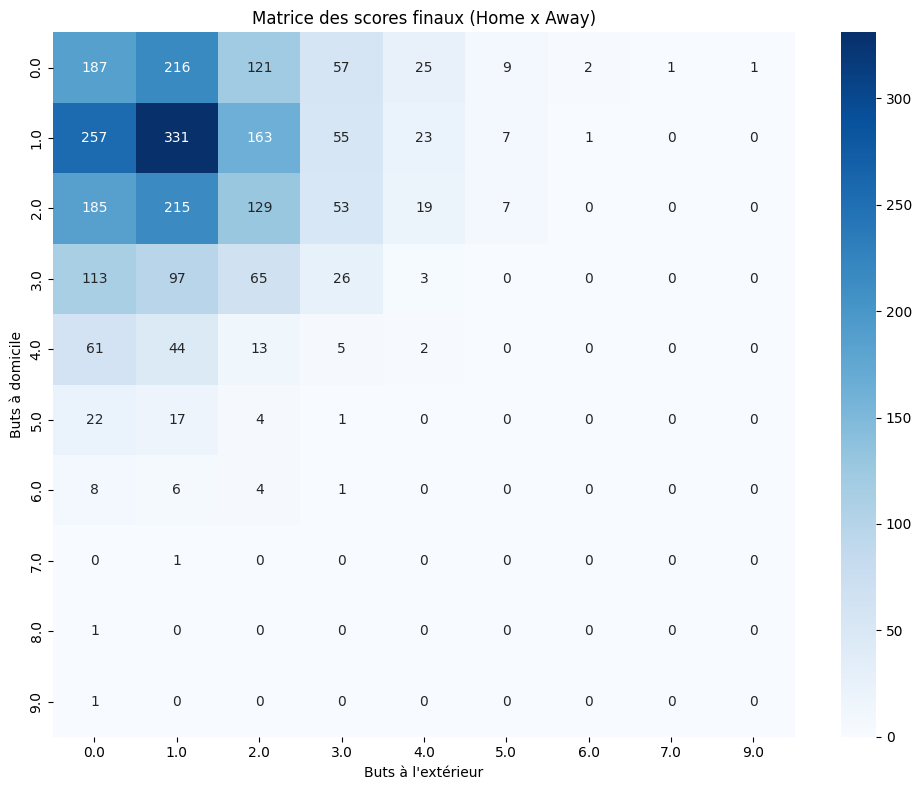

In [ ]:
# Création d’une matrice de fréquence des scores finaux
score_matrix = pd.crosstab(df_total["FullTime_Home_Goals"], df_total["FullTime_Away_Goals"])

plt.figure(figsize=(10, 8))
sns.heatmap(score_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice des scores finaux (Home x Away)")
plt.xlabel("Buts à l'extérieur")
plt.ylabel("Buts à domicile")
plt.tight_layout()
plt.show()


**Comprendre les pénalités**

1 - Moyenne de cartons jaunes et rouges par match

In [ ]:
# Cartons par match
yellow_cards_avg = (df_total["Home_Yellow_Cards"] + df_total["Away_Yellow_Cards"]).mean()
red_cards_avg = (df_total["Home_Red_Cards"] + df_total["Away_Red_Cards"]).mean()

print(f"Cartons jaunes moyens par match : {yellow_cards_avg:.2f}")
print(f"Cartons rouges moyens par match : {red_cards_avg:.2f}")


Cartons jaunes moyens par match : 3.74
Cartons rouges moyens par match : 0.26


2 - Histogramme de distribution des cartons rouges / jaunes

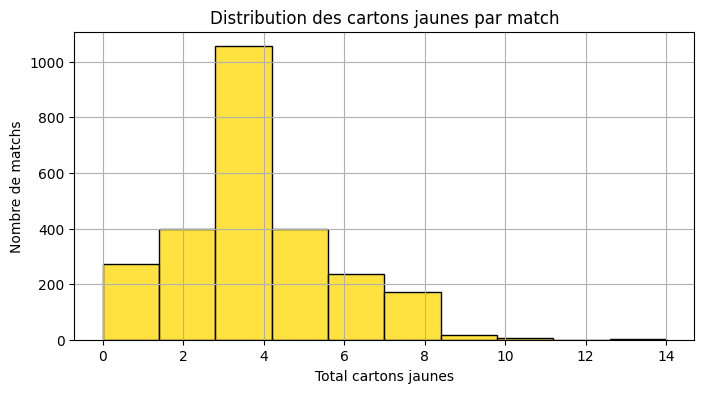

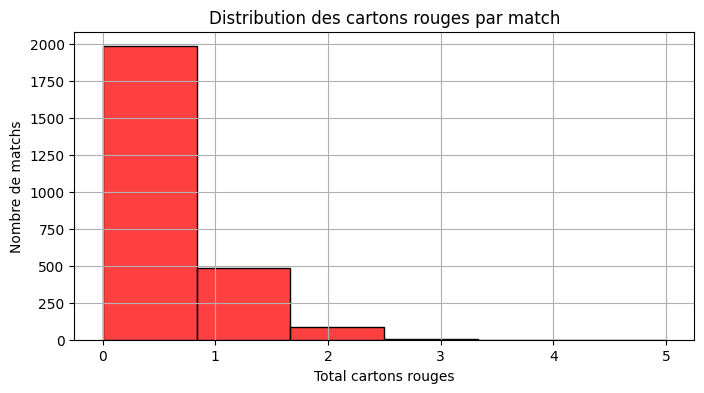

In [ ]:
# Histogramme des cartons jaunes
plt.figure(figsize=(8, 4))
sns.histplot(df_total["Home_Yellow_Cards"] + df_total["Away_Yellow_Cards"], bins=10, color='gold')
plt.title("Distribution des cartons jaunes par match")
plt.xlabel("Total cartons jaunes")
plt.ylabel("Nombre de matchs")
plt.grid(True)
plt.show()

# Histogramme des cartons rouges
plt.figure(figsize=(8, 4))
sns.histplot(df_total["Home_Red_Cards"] + df_total["Away_Red_Cards"], bins=6, color='red')
plt.title("Distribution des cartons rouges par match")
plt.xlabel("Total cartons rouges")
plt.ylabel("Nombre de matchs")
plt.grid(True)
plt.show()


3 - Equipes les plus agressives

In [ ]:
# Total cartons par équipe à domicile et extérieur
df_total["Home_Total_Cards"] = df_total["Home_Yellow_Cards"] + (df_total["Home_Red_Cards"] * 2)
df_total["Away_Total_Cards"] = df_total["Away_Yellow_Cards"] + (df_total["Away_Red_Cards"] * 2)

# Moyenne par club
cards_home = df_total.groupby(["Saison", "Home_Team"])["Home_Total_Cards"].mean().reset_index()
cards_away = df_total.groupby(["Saison", "Away_Team"])["Away_Total_Cards"].mean().reset_index()

# Harmonisation des noms
cards_home = cards_home.rename(columns={"Home_Team": "Club", "Home_Total_Cards": "Avg_Home_Cards"})
cards_away = cards_away.rename(columns={"Away_Team": "Club", "Away_Total_Cards": "Avg_Away_Cards"})

# Fusion
cards_club = pd.merge(cards_home, cards_away, on=["Saison", "Club"])
cards_club["Total_Avg_Cards"] = cards_club["Avg_Home_Cards"] + cards_club["Avg_Away_Cards"]

# Top 5 clubs les plus "sanctionnés"
top_aggressive = cards_club.sort_values(by="Total_Avg_Cards", ascending=False).head(5)
print("Top 5 clubs les plus sanctionnés :")
print(top_aggressive[["Saison", "Club", "Total_Avg_Cards"]])


Top 5 clubs les plus sanctionnés :
    Saison       Club  Total_Avg_Cards
108   2020  Marseille         6.157895
129   2021       Metz         6.105263
89    2019     Monaco         5.785714
125   2021      Lille         5.736842
104   2020       Lens         5.684211


4 - Evolution des sanctions par saison

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


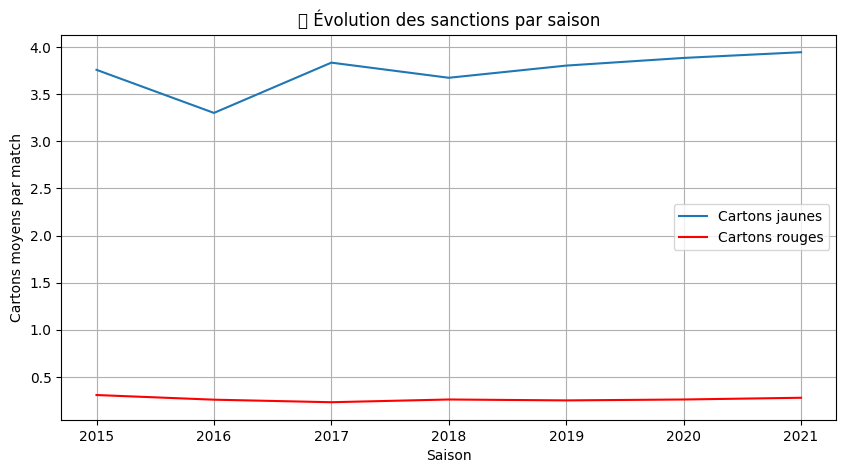

In [ ]:
# Moyenne par saison
cards_season = df_total.groupby("Saison")[["Home_Yellow_Cards", "Away_Yellow_Cards",
                                           "Home_Red_Cards", "Away_Red_Cards"]].mean().reset_index()

# Total cartons par saison
cards_season["Total_Yellow"] = cards_season["Home_Yellow_Cards"] + cards_season["Away_Yellow_Cards"]
cards_season["Total_Red"] = cards_season["Home_Red_Cards"] + cards_season["Away_Red_Cards"]

# Visualisation
plt.figure(figsize=(10, 5))
sns.lineplot(data=cards_season, x="Saison", y="Total_Yellow", label="Cartons jaunes")
sns.lineplot(data=cards_season, x="Saison", y="Total_Red", label="Cartons rouges", color="red")
plt.title("📈 Évolution des sanctions par saison")
plt.xlabel("Saison")
plt.ylabel("Cartons moyens par match")
plt.legend()
plt.grid(True)
plt.show()


**Analyser les cotes des bookmakers**

1 - Analyser la répartition des cotes

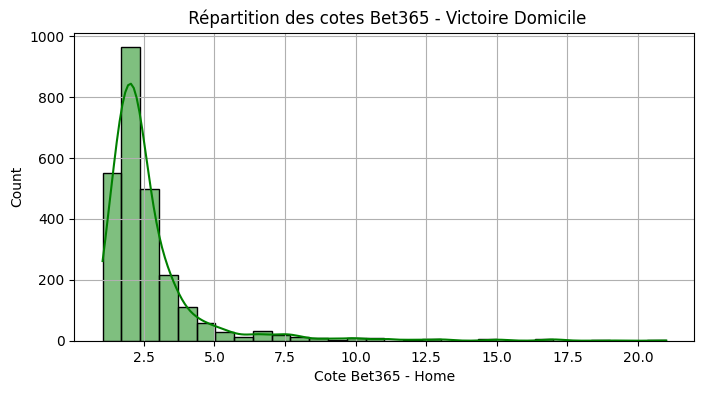

In [ ]:
# Histogramme des cotes Bet365 pour les victoires à domicile
plt.figure(figsize=(8, 4))
sns.histplot(df_total["B365H"], kde=True, color='green', bins=30)
plt.title(" Répartition des cotes Bet365 - Victoire Domicile")
plt.xlabel("Cote Bet365 - Home")
plt.grid(True)
plt.show()


2 - Calculer les probabilités implicites

In [ ]:
# Probabilités implicites brutes
df_total["B365_Prob_H"] = 1 / df_total["B365H"]
df_total["B365_Prob_D"] = 1 / df_total["B365D"]
df_total["B365_Prob_A"] = 1 / df_total["B365A"]

# Normalisation (pour enlever la marge bookmaker)
total_prob = df_total["B365_Prob_H"] + df_total["B365_Prob_D"] + df_total["B365_Prob_A"]
df_total["B365_Prob_H"] /= total_prob
df_total["B365_Prob_D"] /= total_prob
df_total["B365_Prob_A"] /= total_prob


3 - Comparer les prédictions aux résultats réels

In [ ]:
def predict_bet365(row):
    odds = {
        "H": row["B365H"],
        "D": row["B365D"],
        "A": row["B365A"]
    }
    return min(odds, key=odds.get)

df_total["B365_Prediction"] = df_total.apply(predict_bet365, axis=1)

# Comparaison avec le vrai résultat
df_total["B365_Correct"] = df_total["B365_Prediction"] == df_total["FullTime_Result"]
accuracy = df_total["B365_Correct"].mean()
print(f"Taux de réussite des prédictions Bet365 : {accuracy:.2%}")


Taux de réussite des prédictions Bet365 : 51.58%


4 - Analyse des écarts entre bookmakers

In [ ]:
df_total["Best_Home_Cote"] = df_total[["B365H", "PSH", "BWH", "IWH", "WHH", "VCH"]].min(axis=1)
df_total["Worst_Home_Cote"] = df_total[["B365H", "PSH", "BWH", "IWH", "WHH", "VCH"]].max(axis=1)
df_total["Home_Cote_Variation"] = df_total["Worst_Home_Cote"] - df_total["Best_Home_Cote"]

print("Variation moyenne entre meilleures et pires cotes Home :", df_total["Home_Cote_Variation"].mean())


# Feature Engineering

**Ajout du résultat du même match la saison précédente**

**Intérêt:** utiliser l'information historique de la saison précédente pour le même match afin de capturer une dynamique potentielle entre deux équipes

In [ ]:
# 1. Créer copie pour filtrer les colonnes utiles
df_last_season = df_total[[
    "Away_Team", "Home_Team", "Saison",
    "FullTime_Result", "FullTime_Home_Goals", "FullTime_Away_Goals"
]].copy()

In [ ]:
# 2. Renommage des colonnes pour préparer la fusion
df_last_season = df_last_season.rename(columns={
    "FullTime_Result": "Last_Season_Result",
    "FullTime_Home_Goals": "Last_Season_Home_Goals",
    "FullTime_Away_Goals": "Last_Season_Away_Goals"
})

In [ ]:
# 3. Incrément saison de +1 pour faire correspondre les matchs entre saisons successives
# Exemple : un match de 2015 deviendra utilisable pour matcher avec celui de 2016
df_last_season["Saison"] = (df_last_season["Saison"].astype(int) + 1).astype(str)

# Harmonisation noms d'équipes et format saisons
for col in ["Home_Team", "Away_Team"]:
    df_total[col] = df_total[col].str.strip().str.lower()
    df_last_season[col] = df_last_season[col].str.strip().str.lower()

df_total["Saison"] = df_total["Saison"].astype(str)
df_last_season["Saison"] = df_last_season["Saison"].astype(str)


NameError: name 'df_last_season' is not defined

In [ ]:
# 4. Fusion des résultats de l'année précédente dans le DataFrame principal
df_total = df_total.merge(
    df_last_season,
    on=["Home_Team", "Away_Team", "Saison"],
    how="left",
    suffixes=('', '_last_season'),  # différencier les colonnes
    indicator=True
)

print(df_total["_merge"].value_counts())

df_total.drop(columns=["_merge"], inplace=True)

_merge
both          1605
left_only      954
right_only       0
Name: count, dtype: int64


In [ ]:
# 5. Nettoyage : on remplace les valeurs manquantes (matchs non trouvés la saison précédente) par 0 pour les colonnes numériques
df_total["Last_Season_Home_Goals"] = df_total["Last_Season_Home_Goals"].fillna(0)
df_total["Last_Season_Away_Goals"] = df_total["Last_Season_Away_Goals"].fillna(0)

# 6. Remplir les NaN de Last_Season_Result si besoin (facultatif)
df_total["Last_Season_Result"] = df_total["Last_Season_Result"].fillna("Inconnu")

# Aperçu final
df_total[["Home_Team", "Away_Team", "Saison", "Last_Season_Result", "Last_Season_Home_Goals", "Last_Season_Away_Goals"]]

,Home_Team,Away_Team,Saison,Last_Season_Result,Last_Season_Home_Goals,Last_Season_Away_Goals
0,lille,paris sg,2015,Inconnu,0.0,0.0
1,bastia,rennes,2015,Inconnu,0.0,0.0
2,marseille,caen,2015,Inconnu,0.0,0.0
3,montpellier,angers,2015,Inconnu,0.0,0.0
4,nantes,guingamp,2015,Inconnu,0.0,0.0
...,...,...,...,...,...,...
2554,lorient,troyes,2021,Inconnu,0.0,0.0
2555,marseille,strasbourg,2021,D,1.0,1.0
2556,nantes,st etienne,2021,D,2.0,2.0
2557,paris sg,metz,2021,H,1.0,0.0


**Classement dynamique & forme sur 5 derniers matchs**

Pourquoi 5 matchs ?

Refléter la forme actuelle d'une équipe, le niveau réel du moment

5 matchs = environ 1 mois de compétition



**Intérêt**: construire un df par équipe pour suivre son évolution au fil des matchs (points, forme, etc.)

In [ ]:
# 1. Création d'un DataFrame par équipe avec les matchs à domicile
home_df = df_total[[
    "Match_Date", "Saison", "Home_Team", "FullTime_Result",
    "FullTime_Home_Goals", "Home_Shots", "Home_Shots_On_Target",
    "Home_Yellow_Cards", "Home_Red_Cards", "Home_Corners"
]].copy()

home_df = home_df.rename(columns={
    "Home_Team": "Equipe",
    "FullTime_Home_Goals": "Buts",
    "Home_Shots": "Nb_tirs",
    "Home_Shots_On_Target": "Nb_tirs_cadres",
    "Home_Yellow_Cards": "Carton_jaune",
    "Home_Red_Cards": "Carton_rouge",
    "Home_Corners": "Corners"
})

home_df["Lieu"] = "D"
home_df["Date"] = home_df["Match_Date"]

# Attribution des points
home_df["Nb_points"] = home_df["FullTime_Result"].map({"H": 3, "D": 1, "A": 0})


In [ ]:
# 2. Matchs à l'extérieur (même structure)
away_df = df_total[[
    "Match_Date", "Saison", "Away_Team", "FullTime_Result",
    "FullTime_Away_Goals", "Away_Shots", "Away_Shots_On_Target",
    "Away_Yellow_Cards", "Away_Red_Cards", "Away_Corners"
]].copy()

away_df = away_df.rename(columns={
    "Away_Team": "Equipe",
    "FullTime_Away_Goals": "Buts",
    "Away_Shots": "Nb_tirs",
    "Away_Shots_On_Target": "Nb_tirs_cadres",
    "Away_Yellow_Cards": "Carton_jaune",
    "Away_Red_Cards": "Carton_rouge",
    "Away_Corners": "Corners"
})

away_df["Lieu"] = "E"
away_df["Date"] = away_df["Match_Date"]

away_df["Nb_points"] = away_df["FullTime_Result"].map({"A": 3, "D": 1, "H": 0})

In [ ]:
# 3. Fusion domicile + extérieur et tri
team_df = pd.concat([home_df, away_df])
team_df.sort_values(by=["Saison", "Equipe", "Date"], inplace=True)
team_df.reset_index(drop=True, inplace=True)
print("Total matchs cumulés :", team_df.shape[0])
print("Aperçu :")
print(team_df.head())


Total matchs cumulés : 5118
Aperçu :
  Match_Date Saison        Equipe FullTime_Result  Buts  Nb_tirs  \
0 2015-08-08   2015  ajaccio gfco               D   0.0      6.0   
1 2015-08-16   2015  ajaccio gfco               H   0.0      8.0   
2 2015-08-22   2015  ajaccio gfco               A   0.0      8.0   
3 2015-08-29   2015  ajaccio gfco               H   0.0     12.0   
4 2015-09-13   2015  ajaccio gfco               A   0.0     24.0   

   Nb_tirs_cadres  Carton_jaune  Carton_rouge  Corners Lieu       Date  \
0             1.0           4.0           0.0      3.0    E 2015-08-08   
1             2.0           3.0           0.0      1.0    E 2015-08-16   
2             3.0           2.0           0.0      9.0    D 2015-08-22   
3             6.0           3.0           0.0      4.0    E 2015-08-29   
4             4.0           3.0           0.0     14.0    D 2015-09-13   

   Nb_points  
0          1  
1          0  
2          0  
3          0  
4          0  


**Calcul des moyennes sur es 5 derniers matchs**

In [ ]:
# Liste des colonnes sur lesquelles on applique la moyenne glissante
rolling_cols = [
    "Nb_points", "Buts", "Nb_tirs", "Nb_tirs_cadres",
    "Carton_jaune", "Carton_rouge", "Corners"
]

# Application du rolling par équipe et saison
for col in rolling_cols:
    rolling_col_name = f"Moy_{col}_5_matchs"
    team_df[rolling_col_name] = (
        team_df
        .groupby(["Saison", "Equipe"])[col]
        .rolling(window=5, min_periods=1, closed='left')
        .mean()
        .reset_index(level=[0,1], drop=True)
    )
    print(f"Colonne ajoutée : {rolling_col_name}")

print("\nAperçu des nouvelles colonnes :")
print(team_df[["Equipe", "Date"] + [f"Moy_{col}_5_matchs" for col in rolling_cols]].head(10))


Colonne ajoutée : Moy_Nb_points_5_matchs
Colonne ajoutée : Moy_Buts_5_matchs
Colonne ajoutée : Moy_Nb_tirs_5_matchs
Colonne ajoutée : Moy_Nb_tirs_cadres_5_matchs
Colonne ajoutée : Moy_Carton_jaune_5_matchs
Colonne ajoutée : Moy_Carton_rouge_5_matchs
Colonne ajoutée : Moy_Corners_5_matchs

Aperçu des nouvelles colonnes :
         Equipe       Date  Moy_Nb_points_5_matchs  Moy_Buts_5_matchs  \
0  ajaccio gfco 2015-08-08                     NaN                NaN   
1  ajaccio gfco 2015-08-16                1.000000                0.0   
2  ajaccio gfco 2015-08-22                0.500000                0.0   
3  ajaccio gfco 2015-08-29                0.333333                0.0   
4  ajaccio gfco 2015-09-13                0.250000                0.0   
5  ajaccio gfco 2015-09-19                0.200000                0.0   
6  ajaccio gfco 2015-09-23                0.000000                0.2   
7  ajaccio gfco 2015-09-26                0.200000                0.4   
8  ajaccio gfco 2015-

**Fusion des moyennes 5 matchs avec le dataframe principal**

In [ ]:
# 1. Fusion pour l'équipe à domicile
df_total = df_total.merge(
    team_df[[
        "Equipe", "Date", "Saison",
        "Moy_Nb_points_5_matchs", "Moy_Buts_5_matchs", "Moy_Nb_tirs_5_matchs",
        "Moy_Nb_tirs_cadres_5_matchs", "Moy_Carton_jaune_5_matchs",
        "Moy_Carton_rouge_5_matchs", "Moy_Corners_5_matchs"
    ]],
    left_on=["Home_Team", "Match_Date", "Saison"],
    right_on=["Equipe", "Date", "Saison"],
    how="left"
)
df_total.rename(columns={
    "Moy_Nb_points_5_matchs": "Moy_points_5_match_dom",
    "Moy_Buts_5_matchs": "Moy_buts_5_matchs_dom",
    "Moy_Nb_tirs_5_matchs": "Moy_tirs_5_matchs_dom",
    "Moy_Nb_tirs_cadres_5_matchs": "Moy_tirs_cadres_5_matchs_dom",
    "Moy_Carton_jaune_5_matchs": "Moy_carton_J_5_matchs_dom",
    "Moy_Carton_rouge_5_matchs": "Moy_carton_R_5_matchs_dom",
    "Moy_Corners_5_matchs": "Moy_corners_5_matchs_dom"
}, inplace=True)

# 2. Fusion pour l'équipe à l'extérieur
df_total = df_total.merge(
    team_df[[
        "Equipe", "Date", "Saison",
        "Moy_Nb_points_5_matchs", "Moy_Buts_5_matchs", "Moy_Nb_tirs_5_matchs",
        "Moy_Nb_tirs_cadres_5_matchs", "Moy_Carton_jaune_5_matchs",
        "Moy_Carton_rouge_5_matchs", "Moy_Corners_5_matchs"
    ]],
    left_on=["Away_Team", "Match_Date", "Saison"],
    right_on=["Equipe", "Date", "Saison"],
    how="left"
)
df_total.rename(columns={
    "Moy_Nb_points_5_matchs": "Moy_points_5_match_ext",
    "Moy_Buts_5_matchs": "Moy_buts_5_matchs_ext",
    "Moy_Nb_tirs_5_matchs": "Moy_tirs_5_matchs_ext",
    "Moy_Nb_tirs_cadres_5_matchs": "Moy_tirs_cadres_5_matchs_ext",
    "Moy_Carton_jaune_5_matchs": "Moy_carton_J_5_matchs_ext",
    "Moy_Carton_rouge_5_matchs": "Moy_carton_R_5_matchs_ext",
    "Moy_Corners_5_matchs": "Moy_corners_5_matchs_ext"
}, inplace=True)

# Suppr colonnes intermédiaires inutiles
df_total.drop(columns=["Equipe_x", "Date_x", "Equipe_y", "Date_y"], errors="ignore", inplace=True)


# Traitement des valeurs manquantes
# colonnes à remplir
cols_dom = [
    "Moy_points_5_match_dom", "Moy_buts_5_matchs_dom", "Moy_tirs_5_matchs_dom",
    "Moy_tirs_cadres_5_matchs_dom", "Moy_carton_J_5_matchs_dom",
    "Moy_carton_R_5_matchs_dom", "Moy_corners_5_matchs_dom"
]
cols_ext = [
    "Moy_points_5_match_ext", "Moy_buts_5_matchs_ext", "Moy_tirs_5_matchs_ext",
    "Moy_tirs_cadres_5_matchs_ext", "Moy_carton_J_5_matchs_ext",
    "Moy_carton_R_5_matchs_ext", "Moy_corners_5_matchs_ext"
]

# 0 ou moyenne globale selon type de colonne
for col in cols_dom + cols_ext:
    if "carton" in col:
        df_total[col] = df_total[col].fillna(0)  # Zéro faute/carton par défaut
    else:
        moyenne_hors_test = df_total.loc[df_total["Saison"] != "2021", col].mean()
        df_total[col] = df_total[col].fillna(moyenne_hors_test)
        print(f"Moyenne imputée pour {col} : {round(moyenne_hors_test, 2)}")




Moyenne imputée pour Moy_points_5_match_dom : 1.34
Moyenne imputée pour Moy_buts_5_matchs_dom : 1.28
Moyenne imputée pour Moy_tirs_5_matchs_dom : 11.81
Moyenne imputée pour Moy_tirs_cadres_5_matchs_dom : 4.07
Moyenne imputée pour Moy_corners_5_matchs_dom : 4.73
Moyenne imputée pour Moy_points_5_match_ext : 1.4
Moyenne imputée pour Moy_buts_5_matchs_ext : 1.32
Moyenne imputée pour Moy_tirs_5_matchs_ext : 12.09
Moyenne imputée pour Moy_tirs_cadres_5_matchs_ext : 4.17
Moyenne imputée pour Moy_corners_5_matchs_ext : 4.87


**Création du DataFrame final pour la modélisation : df_model**

In [ ]:
# 1. Index unique : traçabilité et debug
index_unique = df_total["Saison"] + " - " + df_total["Home_Team"] + " - " + df_total["Away_Team"]
df_total.index = index_unique

# 2. Suppr colonnes non utilisables ou répétitives
colonnes_a_supprimer = [
    "Match_Date", "Home_Team", "Away_Team",
    "FullTime_Home_Goals", "FullTime_Away_Goals",
    "Home_Shots", "Away_Shots", "Home_Shots_On_Target", "Away_Shots_On_Target",
    "Home_Corners", "Away_Corners",
    "Home_Yellow_Cards", "Away_Yellow_Cards",
    "Home_Red_Cards", "Away_Red_Cards"
]

# On garde les colonnes issues du Feature Engineering + cible (FullTime_Result)
df_model = df_total.drop(columns=colonnes_a_supprimer, errors="ignore")

# 3. Vérif finale
print("\n Aperçu du DataFrame df_model :")
print(df_model.head())
print("\nShape :", df_model.shape)


🔹 Aperçu du DataFrame df_model :
                            League_Division FullTime_Result  \
2015 - lille - paris sg                  F1               A   
2015 - bastia - rennes                   F1               H   
2015 - marseille - caen                  F1               A   
2015 - montpellier - angers              F1               A   
2015 - nantes - guingamp                 F1               H   

                             HalfTime_Home_Goals  HalfTime_Away_Goals  \
2015 - lille - paris sg                      0.0                  0.0   
2015 - bastia - rennes                       0.0                  1.0   
2015 - marseille - caen                      0.0                  1.0   
2015 - montpellier - angers                  0.0                  1.0   
2015 - nantes - guingamp                     0.0                  0.0   

                            HalfTime_Result    HF    AF  B365H  B365D  B365A  \
2015 - lille - paris sg                   D  20.0  17.0   6.50    3.

# Recherche du meilleur modèle

# Selection variable

Préparation des données : variables (X, y)

In [ ]:
# 1. Variable cible (y) : le résultat du match
y = df_model["FullTime_Result"]

# 2. Variables explicatives (X)
drop_cols = ["FullTime_Result", "Saison"]
X = df_model.drop(columns=drop_cols)

# 3. Encodage des variables qualitatives
X = pd.get_dummies(X, drop_first=True)

# 4. Split A/B testing : saisons 2015-2020 pour l'entraînement, 2021 pour le test
mask_train = df_model.index.str.contains("2015|2016|2017|2018|2019|2020")
mask_test = df_model.index.str.contains("2021")

X_train, X_test = X[mask_train], X[mask_test]
y_train, y_test = y[mask_train], y[mask_test]

# 5. Contrôle final
print(" Taille X_train :", X_train.shape)
print(" Taille X_test  :", X_test.shape)
print(" Distribution y_test :", y_test.value_counts().to_dict())


 Taille X_train : (2179, 153)
 Taille X_test  : (380, 153)
 Distribution y_test : {'H': 162, 'A': 116, 'D': 102}


**RANDOM FOREST**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entraînement du modèle
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf.predict(X_test)

# Évaluation
print("\n Rapport de classification - Random Forest :")
print(classification_report(y_test, y_pred_rf))

print("\n Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))



 Rapport de classification - Random Forest :
              precision    recall  f1-score   support

           A       0.87      0.95      0.91       116
           D       0.84      0.79      0.82       102
           H       0.97      0.94      0.95       162

    accuracy                           0.90       380
   macro avg       0.89      0.89      0.89       380
weighted avg       0.90      0.90      0.90       380


 Matrice de confusion :
[[110   6   0]
 [ 16  81   5]
 [  1   9 152]]


La fonction classification_report donne :


**Precision** => % de bonnes prédictions parmi celles faites (ex. : combien de prédits sont vraiment H)


**Recall** =>	% de bonnes prédictions parmi les vraies (ex. : combien de vrais H ont été retrouvés)


**F1-score** =>	Moyenne harmonique entre précision et recall


**Support** =>	Nombre réel d'exemples pour chaque classe

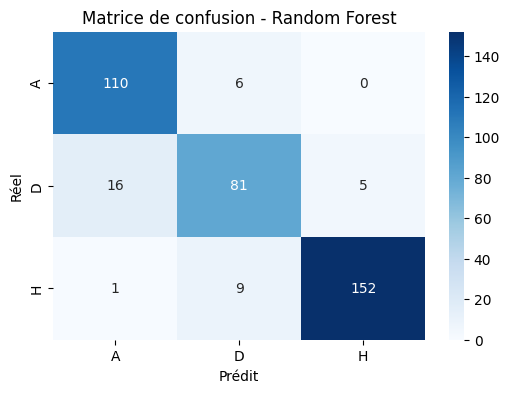

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


**Modèle Logistic Regression**

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)
y_pred_log = log_reg.predict(X_test_imputed)

# Évaluation
print("\n Rapport de classification - Logistic Regression :")
print(classification_report(y_test, y_pred_log))

print("\n Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_log))


 Rapport de classification - Logistic Regression :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       116
           D       1.00      1.00      1.00       102
           H       1.00      1.00      1.00       162

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380


 Matrice de confusion :
[[116   0   0]
 [  0 102   0]
 [  0   0 162]]


**Modèle K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)

# Prédiction
y_pred_knn = knn.predict(X_test_imputed)

# Évaluation
print("\n Rapport de classification - KNN :")
print(classification_report(y_test, y_pred_knn))

print("\n Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_knn))


 Rapport de classification - KNN :
              precision    recall  f1-score   support

           A       0.51      0.66      0.58       116
           D       0.45      0.32      0.38       102
           H       0.71      0.68      0.69       162

    accuracy                           0.58       380
   macro avg       0.55      0.56      0.55       380
weighted avg       0.58      0.58      0.57       380


 Matrice de confusion :
[[ 77  23  16]
 [ 39  33  30]
 [ 34  18 110]]


**Modèle XGBoost Classifier**

In [ ]:
!pip install xgboost scikit-learn
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Entraînement du modèle XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
X_train.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]

xgb.fit(X_train, y_train_encoded)

# Prédiction
y_pred_xgb = xgb.predict(X_test)

y_pred_xgb = le.inverse_transform(y_pred_xgb)

# Évaluation
print("\n Rapport de classification - XGBoost :")
print(classification_report(y_test, y_pred_xgb))

print("\n Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Rapport de classification - XGBoost :
              precision    recall  f1-score   support

           A       1.00      0.99      1.00       116
           D       0.98      1.00      0.99       102
           H       1.00      0.99      1.00       162

    accuracy                           0.99       380
   macro avg       0.99      1.00      0.99       380
weighted avg       0.99      0.99      0.99       380


 Matrice de confusion :
[[115   1   0]
 [  0 102   0]
 [  0   1 161]]


**Comparaison des performances des modèles**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Dictionnaire des prédictions
model_results = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_log,
    "KNN": y_pred_knn,
    "XGBoost": y_pred_xgb
}

# Calcul des métriques pour chaque modèle
print("\n Récapitulatif des scores :\n")
print(f"{'Modèle':<25}{'Accuracy':<10}{'F1-score':<10}")
print("-" * 45)

for name, y_pred in model_results.items():
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name:<25}{acc:.4f}    {f1:.4f}")



 Récapitulatif des scores :

Modèle                   Accuracy  F1-score  
---------------------------------------------
Random Forest            0.9026    0.9023
Logistic Regression      1.0000    1.0000
KNN                      0.5789    0.5723
XGBoost                  0.9947    0.9948


**1. Logistic Regression**

Résultat parfait (100%) sur l’échantillon de test.

Peut indiquer une sur-apprentissage (overfitting), à vérifier avec validation croisée ou sur d'autres saisons.

Très performant ici, mais il faudra confirmer sa robustesse.

**2. XGBoost**

Score quasi parfait également (près de 99.5%).

Meilleure capacité à capturer des patterns complexes que les arbres classiques.

Très bon candidat si on veut un compromis entre performance et robustesse.

**3. Random Forest**

Très bon score : 90% de précision, excellent pour un modèle de base.

Moins précis que XGBoost mais souvent plus rapide à entraîner et interpréter.

**4. KNN**

Le plus faible : 57%, ce qui montre ses limites ici.
Peut être sensible au bruit, à la dimensionnalité et aux données déséquilibrées.

# Optimisation du meilleur modèle

**Optimisation de XGBoost avec GridSearchCV**

GridSearchCV va permettre de tester automatiquement plusieurs combinaisons d’hyperparamètres sur les données d’entraînement via validation croisée, pour choisir la meilleure configuration possible

Hyperparamètres testés :
- n_estimators : nombre d'arbres (plus = meilleur, mais plus lent)
- max_depth : profondeur des arbres (contrôle la complexité)
- learning_rate : impact de chaque arbre (trop petit = lent / trop grand = imprécis)
- subsample : proportion d'observations utilisées pour chaque arbre (permet réduction du sur-apprentissage)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

xgb_grid = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # validation croisée à 3 plis (rapide)
    verbose=1,
    n_jobs=-1  # utilisation de tous les cœurs dispo
)

# Exécution de la recherche
print("\n Lancement du GridSearch sur XGBoost...")
grid_search.fit(X_train, y_train_encoded)

print("\n Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

print("\n Score sur la validation croisée :")
print(round(grid_search.best_score_, 4))


 Lancement du GridSearch sur XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Meilleurs paramètres trouvés :
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

 Score sur la validation croisée :
0.9963


**Voting Classifier : combinaison de plusieurs modèles**

C’est un modèle d’assemblage (ensemble) qui combine plusieurs modèles de classification et vote pour la prédiction finale.

Ici, il combine :
- Logistic Regression (linéaire)
- Random Forest (non-linéaire, bagging)
- XGBoost (boosting, très puissant)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# 1. Définir les modèles de base (reprise avec params simples)
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Gestion des NaNs
imputer = SimpleImputer(strategy='mean')

# 2. Voting Classifier (hard = vote majoritaire)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='hard'
)

# 3. Entraînement et prédiction
X_train_imputed = imputer.fit_transform(X_train)
voting_clf.fit(X_train_imputed, y_train_encoded)

X_test_imputed = imputer.transform(X_test)
y_pred_vote = voting_clf.predict(X_test_imputed)

y_pred_vote = le.inverse_transform(y_pred_vote)

# 4. Évaluation
print("\n Rapport de classification - Voting Classifier")
print(classification_report(y_test, y_pred_vote))
print("Accuracy :", round(accuracy_score(y_test, y_pred_vote), 4))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:05:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Rapport de classification - Voting Classifier
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       116
           D       0.99      1.00      1.00       102
           H       1.00      0.99      1.00       162

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380

Accuracy : 0.9974


**Interprétation**

Le VotingClassifier obtient une accuracy de 99.74%, ce qui est supérieur à tous les modèles individuels (sauf peut-être LogReg qui était sur-appris).

Il combine efficacement la puissance de XGBoost, la robustesse de Random Forest, et la stabilité de la LogReg.

**Réduction de dimension avec SelectKBest**

La réduction de dimension permet de simplifier le modèle en ne conservant que les variables les plus pertinentes, ce qui améliore la performance, la vitesse d'entraînement et limite le sur-apprentissage.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# SelectKBest : sélectionne les k meilleures variables selon un test statistique (ANOVA ici)
selector = SelectKBest(score_func=f_classif, k=20)  # On garde les 20 meilleures features
X_train_reduced = selector.fit_transform(X_train_imputed, y_train_encoded) # Use imputed data
X_test_reduced = selector.transform(X_test_imputed) # Use imputed data

# Affichage des variables sélectionnées
selected_features = X_train.columns[selector.get_support()]
print("\n Variables sélectionnées :")
print(selected_features.tolist())

# Optionnel : affichage des scores de chaque variable
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by="Score", ascending=False)

print("\n Top 10 variables les plus discriminantes :")
print(feature_scores.head(10))


 Variables sélectionnées :
['HalfTime_Home_Goals', 'HalfTime_Away_Goals', 'B365H', 'BWH', 'IWH', 'IWA', 'PSH', 'WHH', 'VCH', 'BbAHh', 'PSCH', 'SecondHalf_Home_Goals', 'SecondHalf_Away_Goals', 'B365_Prob_H', 'B365_Prob_A', 'B365_Correct', 'Best_Home_Cote', 'Worst_Home_Cote', 'HalfTime_Result_H', 'B365_Prediction_H']

 Top 10 variables les plus discriminantes :
                   Feature        Score
115           B365_Correct  1051.387657
108  SecondHalf_Away_Goals   437.469777
107  SecondHalf_Home_Goals   422.365626
136      HalfTime_Result_H   338.737618
1      HalfTime_Away_Goals   245.558141
0      HalfTime_Home_Goals   240.493909
114            B365_Prob_A   188.269838
112            B365_Prob_H   188.207771
116         Best_Home_Cote   135.628953
10                     IWH   134.931147


 On voit que les données de score mi-temps / deuxième mi-temps sont très importantes, ainsi que les cotes des bookmakers (notamment Bet365).

# Mise en place de SHAP

Expliquer pourquoi une prédiction a été faite

(important en paris, car on engage de l'argent).

In [ ]:
!pip install shap scikit-learn pandas numpy xgboost

HalfTime_Home_Goals           float64
HalfTime_Away_Goals           float64
HF                            float64
AF                            float64
B365H                         float64
                               ...   
B365_Prediction_D             float64
B365_Prediction_H             float64
Last_Season_Result_D          float64
Last_Season_Result_H          float64
Last_Season_Result_Inconnu    float64
Length: 153, dtype: object
HalfTime_Home_Goals           float64
HalfTime_Away_Goals           float64
HF                            float64
AF                            float64
B365H                         float64
                               ...   
B365_Prediction_D             float64
B365_Prediction_H             float64
Last_Season_Result_D          float64
Last_Season_Result_H          float64
Last_Season_Result_Inconnu    float64
Length: 153, dtype: object


100%|===================| 1139/1140 [00:13<00:00]       

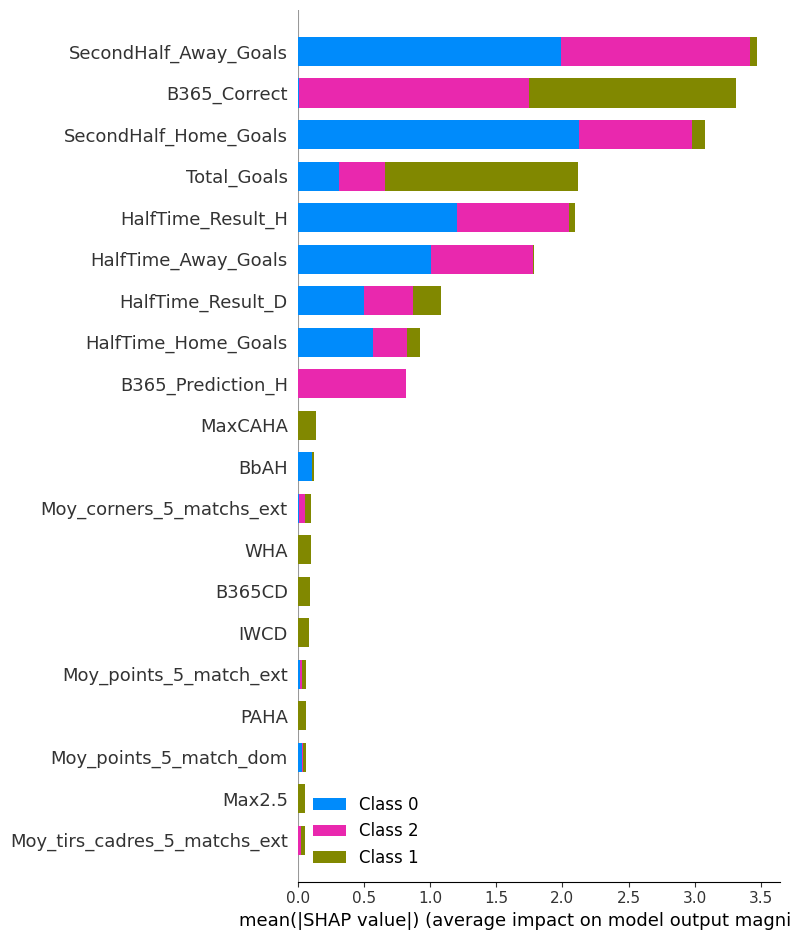

In [ ]:
import pandas as pd
import shap
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns in X_train
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

# Encode categorical columns in X_test
for col in X_test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

# Convert all columns to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Optionally, fill NaN values (if appropriate for your use case)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Explicitly cast to float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Verify data types
print(X_train.dtypes)
print(X_test.dtypes)

# Initialize the explainer and generate SHAP values
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


**Fonction de prédiciton et recommandation de pari**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# 1. Séparer X et y
X = df_model.drop(columns=["FullTime_Result"])
y = df_model["FullTime_Result"]

# 2. Convertir tout en string d'abord
X = X.copy()
for col in X.columns:
    X[col] = X[col].astype(str)

# 3. Encoder toutes les colonnes catégorielles avec LabelEncoder
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# 4. Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Encoder les labels y
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

# 6. Imputation sur les valeurs numériques (ceinture de sécurité)
imputer = SimpleImputer(strategy="mean")
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 7. Entraînement XGBoost
# Nettoyer les noms de colonnes (supprimer les caractères interdits)
clean_columns = [col.replace("[", "").replace("]", "").replace("<", "_inf").replace(">", "_sup") for col in X_train.columns]

X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=clean_columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=clean_columns)


print("Modèle entraîné sans erreur.")


✅ Modèle entraîné sans erreur.


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train_imp, y_train_encoded)
print("Modèle XGBoost entraîné avec succès.")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:06:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Modèle XGBoost entraîné avec succès.


In [ ]:
# ici, on va par eexemple tester les 5 premiers matchs du test set
for i in range(5):
    match_features = X_test_imp.iloc[[i]].copy()
    match_id = X_test.index[i]  # index original pour retrouver le match

    # df_total pour les infos de match
    infos_match = df_total.loc[match_id, ["Match_Date", "Home_Team", "Away_Team", "Saison"]]

    # Prédiction
    pred_encoded = xgb_model.predict(match_features)[0]
    proba = xgb_model.predict_proba(match_features)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    proba_dict = dict(zip(le.classes_, proba))
    max_proba = max(proba_dict.values())
    min_expected_odd = round(1 / max_proba, 2)

    # Recommandation simple
    if min_expected_odd < 1.5:
        conseil = " AUCUNE VALUE"
    else:
        conseil = f" Parier sur {pred_label} si cote > {min_expected_odd}"

    # Affichage
    print(f"\nMatch {i} : {infos_match['Saison']} - {infos_match['Home_Team']} vs {infos_match['Away_Team']}")
    print(f"Date : {infos_match['Match_Date'].date()}")
    print(f"Prédiction : {pred_label}")
    print(f"Probabilités : {proba_dict}")
    print(f"Cote minimale attendue : {min_expected_odd}")
    print(f"{conseil}")



Match 0 : 2021 - lille vs bordeaux
Date : 2022-04-02
Prédiction : 1.0
Probabilités : {'0.0': np.float32(0.0008498036), '1.0': np.float32(0.9984156), '1.2': np.float32(0.00073459727)}
Cote minimale attendue : 1.0
 AUCUNE VALUE

Match 1 : 2021 - troyes vs marseille
Date : 2022-02-27
Prédiction : 1.0
Probabilités : {'0.0': np.float32(0.0022614975), '1.0': np.float32(0.99525934), '1.2': np.float32(0.0024791996)}
Cote minimale attendue : 1.0
 AUCUNE VALUE

Match 2 : 2016 - caen vs nice
Date : 2016-11-06
Prédiction : 1.2
Probabilités : {'0.0': np.float32(9.533512e-05), '1.0': np.float32(0.0025260907), '1.2': np.float32(0.9973786)}
Cote minimale attendue : 1.0
 AUCUNE VALUE

Match 3 : 2021 - metz vs clermont
Date : 2022-04-17
Prédiction : 1.0
Probabilités : {'0.0': np.float32(0.00075191405), '1.0': np.float32(0.99633765), '1.2': np.float32(0.0029104105)}
Cote minimale attendue : 1.0
 AUCUNE VALUE

Match 4 : 2019 - metz vs monaco
Date : 2019-08-17
Prédiction : 1.2
Probabilités : {'0.0': np.fl

**Export des données pour le déploiement**

In [ ]:
df_total.to_csv("df_total.csv")
X_test_imp.to_csv("X_test_imp.csv")
X_train.to_csv("X_train.csv")


**Enregistrement du modèle et de l'encodeur**

In [ ]:
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']